## Relatório Final de Projeto

Integrantes: Emyle Santos, João Victor e Júlia Gabriele

Este projeto apresenta uma análise detalhada dos dados do **RREO** (Relatório Resumido da Execução Orçamentária), focando na interpretação e estudo de dados financeiros e orçamentários reportados pela entidade no primeiro bimestre de 2021 a 2023. Os dados foram fornecidos pela SINCONF (Supervisão de Controle Interno e Financeiro) e têm como objetivo fornecer insights sobre aspectos financeiros no Brasil durante esse período.

Os objetivos deste projeto são:

- Analisar as principais fontes de receita da entidade: Identificar e estudar as fontes de receita mais relevantes da entidade nos anos de 2021, 2022 e 2023, visando **entender as variações e tendências** ao longo desse período.

- Avaliar o comportamento das despesas: Realizar uma análise detalhada das despesas totais da entidade em cada ano, destacando as **categorias de despesa** mais significativas e suas variações.

- Examinar os principais investimentos: Identificar os principais investimentos realizados pela entidade durante o primeiro bimestre dos anos de 2021, 2022 e 2023, buscando avaliar seu impacto no **contexto financeiro.**

Afim de serem respondidas as seguintes perguntas: 
- Quais foram as principais fontes de receita da entidade nos anos de 2021, 2022 e 2023?
- Quais foram as receitas correntes da Prefeitura Municipal de João Pessoa no período analisado?
- Há relação entre o tamanho da população e o valor das receitas obtidas em cada ano?

## Exploração Inicial

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [82]:
caminho_dados = r'C:\Users\gabri\OneDrive\Documentos\2 periodo\intro. cd\projetosiconf\dados\dados_totais.csv'
dataset = pd.read_csv(caminho_dados,  encoding="utf-8")
dataset.head()

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"781,983,935.78"
1,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,"268,827,201.57"
2,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"149,122,846.84"
3,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,"82,253,889.17"
4,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,"8,944,698.43"


In [83]:
# Criando uma copia do dataset para não modificar o original
dataset_copia = dataset.copy()

In [84]:
# Descrição estatística dos dados
dataset_copia.describe()

,Ano,População,Valor
count,"30,209.00","30,209.00","30,209.00"
mean,"2,021.98","1,891,847.88","375,508,189.15"
std,0.82,"2,528,806.94","2,490,792,141.93"
min,"2,021.00","306,296.00","-64,925,679.27"
25%,"2,021.00","548,952.00","5,250,070.54"
50%,"2,022.00","1,031,597.00","27,088,756.10"
75%,"2,023.00","1,963,726.00","144,153,327.77"
max,"2,023.00","12,396,372.00","86,570,289,142.11"


Analisando a descrição estatísca, podemos retirar algumas informações sobre os dados:

*1*- Na coluna 'Ano', temos tres valores 2022, 2023, 2024, que correspondem aos anos que os dados foram retirados       
    1.1- A mediana é 2022, o que significa que metade dos dados correspondem ao ano de 2022

*2*- Na coluna 'População', a média é na casa dos milhões, sugerindo que os dados estão em uma escala grande        
    2.1- O desvio padrão de 2.528.807 sugere uma alta variação, com valores que se espalham amplamente em torno da média.

*3*- Na coluna 'Valor', a média também é um valor bem alto (na casa de centenas de milhões), o que sugere a alta escala de valores tambem.      
    3.1- Analisando o valor min e max, notamos a existência de valores negativos nos dados, o que faz sentido, levando em consideração
que a coluna traz informações sobre os pagamentos de contas.

In [85]:
# Vamos visualizar melhor as linhas referentes aos valores negativos da coluna "valor"
df_valores_negativos = dataset_copia[dataset_copia['Valor'] < 0]

df_valores_negativos

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
492,2021,Prefeitura Municipal de Maceió - AL,AL,1031597,( - ) Transferências obrigatórias da União rel...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,"-632,793.00"
535,2021,Prefeitura Municipal de Maceió - AL,AL,1031597,Outras Receitas Patrimoniais,siconfi-cor_OutrasReceitasPatrimoniais,"-39,174.87"
582,2021,Prefeitura Municipal de Maceió - AL,AL,1031597,( - ) Transferências obrigatórias da União rel...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,"-596,107.00"
961,2021,Prefeitura Municipal de Fortaleza - CE,CE,2703391,(-) Transferências obrigatórias da União relat...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,"-33,604.00"
1049,2021,Prefeitura Municipal de Fortaleza - CE,CE,2703391,(-) Transferências obrigatórias da União relat...,siconfi-cor_RREO3TransferenciasObrigatoriasDaU...,"-300,000.00"
...,...,...,...,...,...,...,...
28430,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,"-1,629,428.92"
28455,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,"-1,927,275.69"
28456,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Rendimentos de Aplicação Financeira,siconfi-cor_RendimentosDeAplicacaoFinanceira,"-1,994,966.02"
28481,2023,Prefeitura Municipal de Belém - PA,PA,1499641,Receita Patrimonial,siconfi-cor_RREO3ReceitaPatrimonial,"-68,776.42"


    Esses valores negativos podem indicar ajustes contábeis, como devoluções de transferências obrigatórias, correções em receitas e despesas, e situações de déficit orçamentário, onde despesas superam receitas previstas. 

## Pré-processamento de dados

No notebook *limpezadedados.ipynb* foi feita uma limpeza de dados em que foram retiradas colunas como: "Cod.IBGE" e "Coluna", para melhor visualização e dados desnecessários. Após isso, os dados ficaram assim:

In [86]:
dataset_copia

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
0,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"781,983,935.78"
1,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,"268,827,201.57"
2,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"149,122,846.84"
3,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,"82,253,889.17"
4,2021,Prefeitura Municipal de Manaus - AM,AM,2255903,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,"8,944,698.43"
...,...,...,...,...,...,...,...
30204,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Compensações Financ. entre Regimes Previdência,siconfi-cor_CompensacaoFinanceiraEntreRegimesP...,"11,019,574.00"
30205,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,"141,564,612.00"
30206,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,"2,747,357,901.85"
30207,2023,Prefeitura Municipal de Cuiabá - MT,MT,618124,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"2,747,357,901.85"


Vamos formatar a coluna "Valor" para que seja fácil a sua leitura

In [87]:
pd.options.display.float_format = '{:,.2f}'.format

In [88]:
dataset_copia.describe()

,Ano,População,Valor
count,"30,209.00","30,209.00","30,209.00"
mean,"2,021.98","1,891,847.88","375,508,189.15"
std,0.82,"2,528,806.94","2,490,792,141.93"
min,"2,021.00","306,296.00","-64,925,679.27"
25%,"2,021.00","548,952.00","5,250,070.54"
50%,"2,022.00","1,031,597.00","27,088,756.10"
75%,"2,023.00","1,963,726.00","144,153,327.77"
max,"2,023.00","12,396,372.00","86,570,289,142.11"


## Perguntas

### Pergunta 1

Quais foram as principais fontes de receita da entidade nos anos escolhidos?

In [89]:
# Vamos visualizar melhor as linhas referentes as contas de valor maiores que 250000000 que corresponde a mais que o terceiro quartil de "Valor"
df_valores_maiores = dataset_copia[dataset_copia['Valor'] > 14415332777]

df_valores_maiores

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
3239,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"15,033,442,777.23"
3271,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"15,816,114,620.00"
3297,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,"14,578,030,747.00"
3298,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"14,578,030,747.00"
3299,2021,Prefeitura Municipal de Belo Horizonte - MG,MG,2530701,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"14,578,030,747.00"
...,...,...,...,...,...,...,...
27069,2023,Prefeitura Municipal do Rio de Janeiro - RJ,RJ,6747815,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"23,576,189,975.06"
27070,2023,Prefeitura Municipal do Rio de Janeiro - RJ,RJ,6747815,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"25,370,523,500.00"
27096,2023,Prefeitura Municipal do Rio de Janeiro - RJ,RJ,6747815,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,"23,472,288,069.00"
27097,2023,Prefeitura Municipal do Rio de Janeiro - RJ,RJ,6747815,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"23,472,288,069.00"


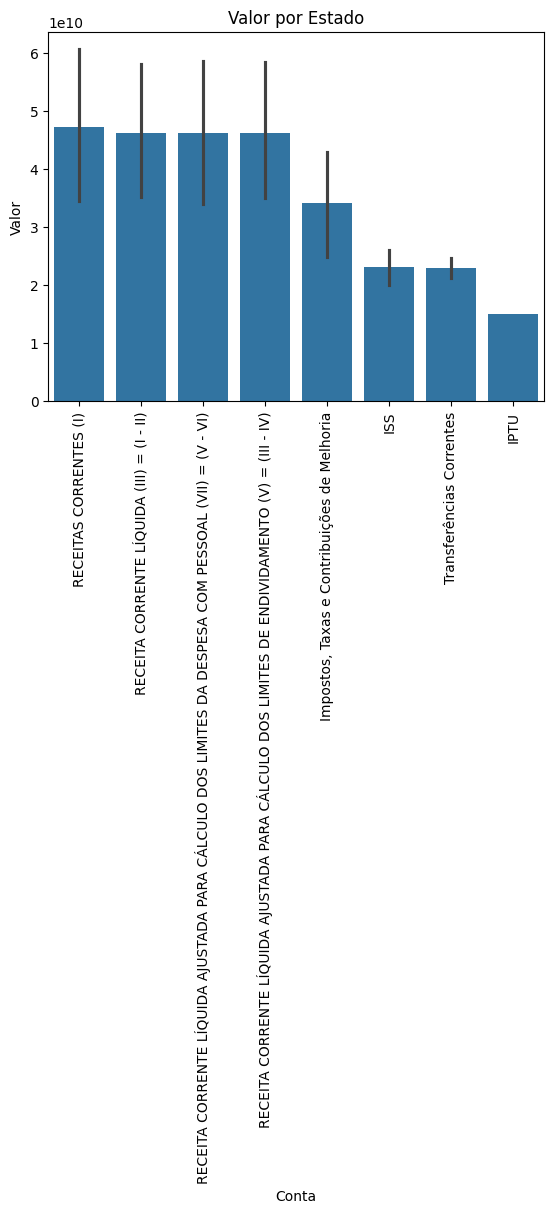

In [90]:
df_valores_maiores = df_valores_maiores.sort_values(by='Valor', ascending=False)

sns.barplot(x='Conta', y='Valor', data=df_valores_maiores)
plt.title('Valor por Estado')
plt.xlabel('Conta')
plt.ylabel('Valor')
plt.xticks(rotation=90)  
plt.show()

### Pergunta 2

Qual foi a tendência dos valores (receitas ou despesas) ao longo dos anos para a Prefeitura de João Pessoa?

In [91]:
df_jp = dataset_copia[dataset_copia['UF'] == "PB"]

df_jp

,Ano,Instituição,UF,População,Conta,Identificador da Conta,Valor
6100,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,RECEITAS CORRENTES (I),siconfi-cor_ReceitasCorrentesLiquidasExcetoTra...,"329,157,559.17"
6101,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,"Impostos, Taxas e Contribuições de Melhoria",siconfi-cor_ReceitaTributariaLiquidaExcetoTran...,"141,855,425.52"
6102,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,IPTU,siconfi-cor_IPTULiquidoExcetoTransferenciasEFU...,"61,379,216.02"
6103,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,ISS,siconfi-cor_ISSLiquidoExcetoTransferenciasEFUNDEB,"25,883,646.94"
6104,2021,Prefeitura Municipal de João Pessoa - PB,PB,825796,ITBI,siconfi-cor_ITBILiquidoExcetoTransferenciasEFU...,"13,834,636.34"
...,...,...,...,...,...,...,...
27851,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,Compensações Financ. entre Regimes Previdência,siconfi-cor_CompensacaoFinanceiraEntreRegimesP...,"12,000,000.00"
27852,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,Dedução de Receita para Formação do FUNDEB,siconfi-cor_DeducaoDeReceitaParaFormacaoDoFUNDEB,"170,066,000.00"
27853,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,RECEITA CORRENTE LÍQUIDA (III) = (I - II),siconfi-cor_RREO3ReceitaCorrenteLiquida,"2,866,817,603.00"
27854,2023,Prefeitura Municipal de João Pessoa - PB,PB,817511,RECEITA CORRENTE LÍQUIDA AJUSTADA PARA CÁLCULO...,siconfi-cor_RREO3ReceitaCorrenteLiquidaAjustad...,"2,866,817,603.00"


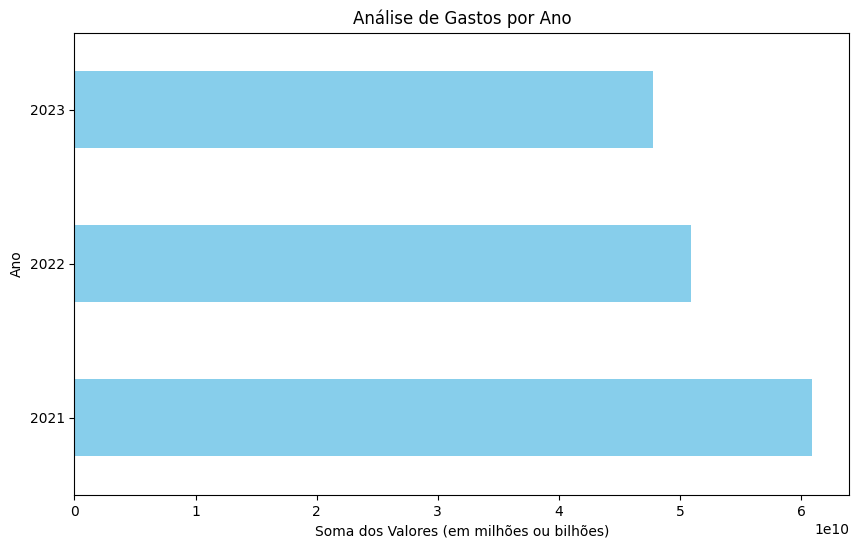

In [103]:
# Agrupar os valores por "Ano" e somar os valores correspondentes
gastos_por_ano = df_jp.groupby('Ano')['Valor'].sum()

# Criar o gráfico horizontal
plt.figure(figsize=(10, 6))
gastos_por_ano.plot(kind='barh', color='skyblue')

# Adicionar título e rótulos
plt.title('Análise de Gastos por Ano')
plt.xlabel('Soma dos Valores (em milhões ou bilhões)')
plt.ylabel('Ano')

# Exibir o gráfico
plt.show()

### Pergunta 3

## Conclusão